In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-02c66371-4823-b02b-28a6-af65a2bee471)


In [25]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15424, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 15424 (delta 0), reused 1 (delta 0), pack-reused 15423
Receiving objects: 100% (15424/15424), 14.05 MiB | 12.32 MiB/s, done.
Resolving deltas: 100% (10364/10364), done.


In [4]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/darknet


In [5]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old ==

In [7]:
def imShow(path):

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# Pre-Training

In [18]:
DRIVE_CFG_PATH = "/content/drive/MyDrive/projects/licence-plate-detection/cfg/yolov4-obj-32.cfg"
DRIVE_TRAIN_ZIP = "/content/drive/MyDrive/projects/licence-plate-detection/data/train.zip"
DRIVE_TEST_ZIP = "/content/drive/MyDrive/projects/licence-plate-detection/data/test.zip"
DRIVE_TRAIN_NAMES = "/content/drive/MyDrive/projects/licence-plate-detection/train.names"
DRIVE_TRAIN_DATA_FILE = "/content/drive/MyDrive/projects/licence-plate-detection/train.data"
DRIVE_GENERATE_TRAIN_FILE = "/content/drive/MyDrive/projects/licence-plate-detection/generate_train.py"
DRIVE_GENERATE_TEST_FILE = "/content/drive/MyDrive/projects/licence-plate-detection/generate_test.py"

CFG_PATH = "cfg/yolov4-obj.cfg"
CFG_FILE = "yolov4-obj.cfg"
TRAIN_ZIP = "/content/train.zip"
TEST_ZIP = "/content/test.zip"
TRAIN_NAMES_FILE = "data/train.names"
TRAIN_DATA_FILE = "data/train.data"

In [10]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [11]:
!cp {DRIVE_TRAIN_ZIP} /content
!cp {DRIVE_TEST_ZIP} /content

In [12]:
!unzip {TRAIN_ZIP}
!unzip {TEST_ZIP}

Archive:  /content/train.zip
   creating: data/train/
  inflating: data/train/082f5ae635a90152.txt  
  inflating: data/train/004f62edd382ccb8.jpg  
  inflating: data/train/00166578c691cd43.jpg  
  inflating: data/train/1f455f2bf64eca31.txt  
  inflating: data/train/26d07e99c6c734cc.jpg  
  inflating: data/train/2234772561378187.jpg  
  inflating: data/train/04f913d1cb935a29.jpg  
  inflating: data/train/38fb6a274b5b494c.txt  
  inflating: data/train/2f15ebca770376c9.txt  
  inflating: data/train/2e8448f82d5f436b.jpg  
  inflating: data/train/1045cfe4e078ea66.jpg  
  inflating: data/train/0e6467a667cc3326.txt  
  inflating: data/train/1af5163a7789e8eb.jpg  
  inflating: data/train/06115e54c1a9a25d.jpg  
  inflating: data/train/0137f744e31ab3ff.txt  
  inflating: data/train/3a4ad03ef0009d91.jpg  
  inflating: data/train/00f04d8a2225b873.jpg  
  inflating: data/train/1278b6189e6cbd7e.jpg  
  inflating: data/train/275b76020f93a073.txt  
  inflating: data/train/003df8cf2effae50.jpg  
  infl

In [ ]:
!cp {CFG_PATH} {DRIVE_CFG_PATH}

Edit config file

In [13]:
!cp {DRIVE_CFG_PATH} {CFG_PATH}

!cp {DRIVE_TRAIN_NAMES} data/
!cp {DRIVE_TRAIN_DATA_FILE} data/
!cp {DRIVE_GENERATE_TRAIN_FILE} .
!cp {DRIVE_GENERATE_TEST_FILE} .

In [14]:
!python3 generate_train.py
!python3 generate_test.py

# Training

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

In [ ]:
!./darknet detector train {TRAIN_DATA_FILE} {CFG_PATH} yolov4.conv.137 -dont_show -map

In [ ]:
imShow("chart.png")

# Training - Continue

In [ ]:
WEIGHTS_PATH = "/content/drive/MyDrive/projects/traffic-sign-detection/backup/yolov4-obj_last.weights"
DRIVE_CFG_PATH = "/content/drive/MyDrive/projects/licence-plate-detection/cfg/yolov4-obj-high-res.cfg"
CFG_FILE = "cfg/yolov4-obj-high-res.cfg"

In [ ]:
#If needed
'''
%cd cfg
!sed -i 's/batch=1/batch=32/' {CFG_FILE}
!sed -i 's/subdivisions=1/subdivisions=8/' {CFG_FILE}
%cd ..
'''

In [ ]:
!cp {CFG_PATH} {DRIVE_CFG_PATH}

In [ ]:
!./darknet detector train {TRAIN_DATA_FILE} {CFG_PATH} {WEIGHTS_PATH}

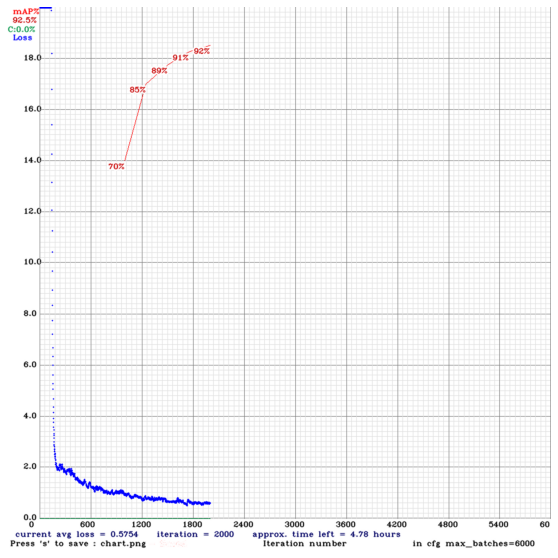

In [ ]:
imShow("chart.png")

In [ ]:
%cd cfg
!sed -i 's/batch=16/batch=1/' {CFG_FILE}
!sed -i 's/subdivisions=4/subdivisions=1/' {CFG_FILE}
%cd ..

/content/darknet/cfg
/content/darknet


In [ ]:
!./darknet detector map {TRAIN_DATA_FILE} {CFG_PATH} {WEIGHTS_PATH}

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    864 x 608 x   3 ->  864 x 608 x  32 0.908 BF
   1 conv     64       3 x 3/ 2    864 x 608 x  32 ->  432 x 304 x  64 4.841 BF
   2 conv     64       1 x 1/ 1    432 x 304 x  64 ->  432 x 304 x  64 1.076 BF
   3 route  1 		                           ->  432 x 304 x  64 
   4 conv     64       1 x 1/ 1    432 x 304 x  64 ->  432 x 304 x  64 1.076 BF
   5 conv     32       1 x 1/ 1    432 x 304 x  64 ->  432 x 304 x  32 0.538 BF
   6 conv     64       3 x 3/ 1    432 x 304 x  32 ->  432 x 304 x  64 4.841 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 432 x 304 x  64 0.008 BF
   8 conv   

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    864 x 608 x   3 ->  864 x 608 x  32 0.908 BF
   1 conv     64       3 x 3/ 2    864 x 608 x  32 ->  432 x 304 x  64 4.841 BF
   2 conv     64       1 x 1/ 1    432 x 304 x  64 ->  432 x 304 x  64 1.076 BF
   3 route  1 		                           ->  432 x 304 x  64 
   4 conv     64       1 x 1/ 1    432 x 304 x  64 ->  432 x 304 x  64 1.076 BF
   5 conv     32       1 x 1/ 1    432 x 304 x  64 ->  432 x 304 x  32 0.538 BF
   6 conv     64       3 x 3/ 1    432 x 304 x  32 ->  432 x 304 x  64 4.841 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 432 x 304 x  64 0.008 BF
   8 conv   

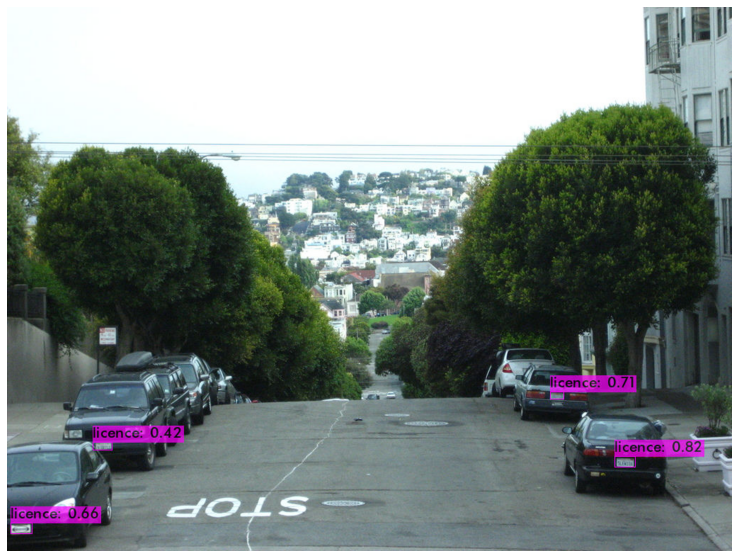

In [ ]:
TEST_FILE = "/content/drive/MyDrive/projects/licence-plate-detection/sample-data/test-7.jpg"
!./darknet detector test {TRAIN_DATA_FILE} {CFG_PATH} {WEIGHTS_PATH} {TEST_FILE}
imShow("predictions.jpg")

# Test and Inferencing

In [15]:
WEIGHTS_PATH = "/content/drive/MyDrive/projects/licence-plate-detection/backup/exp-32/yolov4-obj_best.weights"
CFG_PATH = "cfg/yolov4-obj.cfg"

In [19]:
%cd cfg
!sed -i 's/batch=32/batch=1/' {CFG_FILE}
!sed -i 's/subdivisions=16/subdivisions=1/' {CFG_FILE}
%cd ..

/content/darknet/cfg
/content/darknet


In [20]:
!./darknet detector map {TRAIN_DATA_FILE} {CFG_PATH} {WEIGHTS_PATH}

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    864 x 608 x   3 ->  864 x 608 x  32 0.908 BF
   1 conv     64       3 x 3/ 2    864 x 608 x  32 ->  432 x 304 x  64 4.841 BF
   2 conv     64       1 x 1/ 1    432 x 304 x  64 ->  432 x 304 x  64 1.076 BF
   3 route  1 		                           ->  432 x 304 x  64 
   4 conv     64       1 x 1/ 1    432 x 304 x  64 ->  432 x 304 x  64 1.076 BF
   5 conv     32       1 x 1/ 1    432 x 304 x  64 ->  432 x 304 x  32 0.538 BF
   6 conv     64       3 x 3/ 1    432 x 304 x  32 ->  432 x 304 x  64 4.841 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 432 x 304 x  64 0.008 BF
   8 conv   

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    864 x 608 x   3 ->  864 x 608 x  32 0.908 BF
   1 conv     64       3 x 3/ 2    864 x 608 x  32 ->  432 x 304 x  64 4.841 BF
   2 conv     64       1 x 1/ 1    432 x 304 x  64 ->  432 x 304 x  64 1.076 BF
   3 route  1 		                           ->  432 x 304 x  64 
   4 conv     64       1 x 1/ 1    432 x 304 x  64 ->  432 x 304 x  64 1.076 BF
   5 conv     32       1 x 1/ 1    432 x 304 x  64 ->  432 x 304 x  32 0.538 BF
   6 conv     64       3 x 3/ 1    432 x 304 x  32 ->  432 x 304 x  64 4.841 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 432 x 304 x  64 0.008 BF
   8 conv   

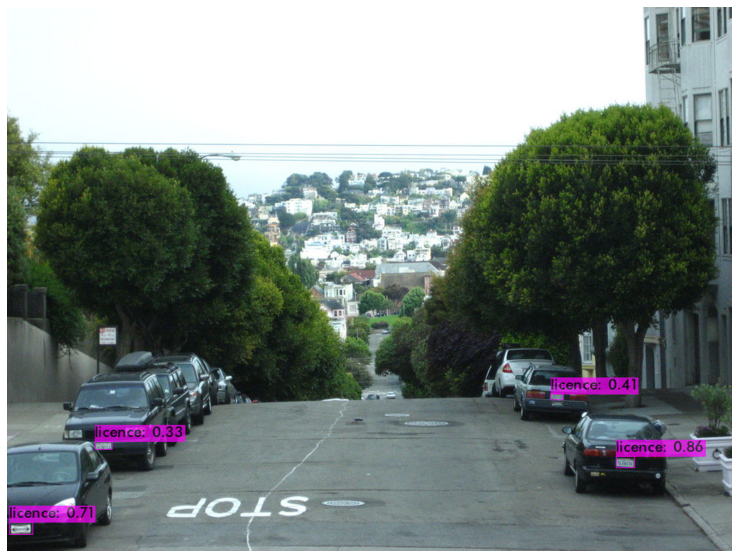

In [21]:
TEST_FILE = "/content/drive/MyDrive/projects/licence-plate-detection/sample-data/test-7.jpg"
!./darknet detector test {TRAIN_DATA_FILE} {CFG_PATH} {WEIGHTS_PATH} {TEST_FILE}
imShow("predictions.jpg")

In [22]:
def draw_bounding_box(img, left, top, right, bottom, class_color, label, confidence):
  overlay = img.copy()
  cv2.rectangle(img, (left, top), (right, bottom), color=class_color, thickness=-1)
  alpha = .8
  img = cv2.addWeighted(overlay, alpha, img, 1 - alpha, 0)
  cv2.rectangle(img, (left, top), (right, bottom), color=class_color, thickness=1)
  cv2.putText(img, "{} - {:.1f}".format(label, float(confidence)), (left, top - 5), cv2.FONT_HERSHEY_DUPLEX, 0.4, class_color, thickness=1)
  #cv2_imshow(image_new)
  return img

In [23]:
from darknet import *

network, class_names, class_colors = load_network(CFG_PATH, TRAIN_DATA_FILE, WEIGHTS_PATH)
width = network_width(network)
height = network_height(network)

def getPrediction(img, width, height):
  darknet_image = make_image(width, height, 3)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_resized = cv2.resize(img_rgb, (width, height), interpolation=cv2.INTER_LINEAR)

  img_height, img_width, _ = img.shape
  width_ratio = img_width/width
  height_ratio = img_height/height

  copy_image_from_bytes(darknet_image, img_resized.tobytes())
  detections = detect_image(network, class_names, darknet_image)
  free_image(darknet_image)
  return detections, width_ratio, height_ratio

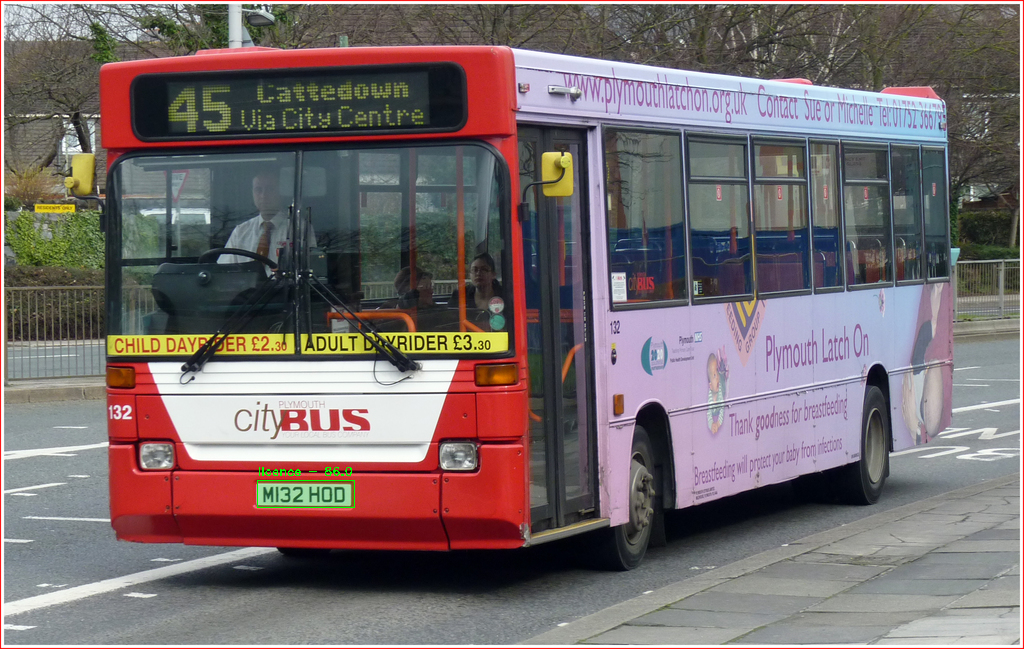

In [28]:
image = cv2.imread("/content/drive/MyDrive/projects/licence-plate-detection/sample-data/test-9.jpg")
detections, width_ratio, height_ratio = getPrediction(image, width, height)

for label, confidence, bbox in detections:
  left, top, right, bottom = bbox2points(bbox)
  left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
  image = draw_bounding_box(image, left, top, right, bottom, (0, 255, 0), label, confidence)
cv2_imshow(image)